### Assignment 1
#### Name: Barun Parua
#### Roll Number: 21CS10014

In [239]:
# importing all the necessary libraries
# pandas for reading the csv file, numpy for mathematical operations, matplotlib for plotting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
df = pd.read_excel('../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx')
print(df.shape)

# randomizing the dataset
df = df.sample(frac=1).reset_index(drop=True)

# splitting the dataset into x and y values
x_total = df.iloc[:, :-1].values
y_total = df.iloc[:, -1].values

y_total = np.where(y_total == 'Ürgüp Sivrisi', int(1), int(0))
print(y_total)

(2500, 13)
[0 1 0 ... 0 0 0]


In [241]:
# normalise the data
for i in range(0, len(x_total[0])):
    mean = np.mean(x_total[:, i])
    std = np.std(x_total[:, i])
    x_total[:, i] = (x_total[:, i] - mean) / std
    
# print(x_total)

In [242]:
# split the data into train, test and validation set
train_size = int(0.5 * len(x_total))
validation_size = int(0.3 * len(x_total))
test_size = int(0.2 * len(x_total))

x_train = x_total[:train_size]
x_validation = x_total[train_size:train_size+validation_size]
x_test = x_total[train_size+validation_size:]

y_train = y_total[:train_size]
y_validation = y_total[train_size:train_size+validation_size]
y_test = y_total[train_size+validation_size:]

print(x_train.shape, y_train.shape)

(1250, 12) (1250,)


In [243]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x,theta):
    return sigmoid(np.dot(x, theta))

def cost(x,y,theta):
    m = len(y)
    h = predict(x, theta)
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(x,y,theta,learning_rate):
    n = len(y)
    h = predict(x, theta)
    gradient = np.dot(x.T, (h - y)) / n
    theta -= learning_rate * gradient
    return theta
    

[ 0.16431962  0.49913871  0.74699294 -0.72224878 -0.20672129 -0.15539521
  0.89633318  0.33320998  0.1784573   0.13534919  0.73512244 -0.30502413]
Accuracy:  0.872
Precision:  0.8428
Recall:  0.8733


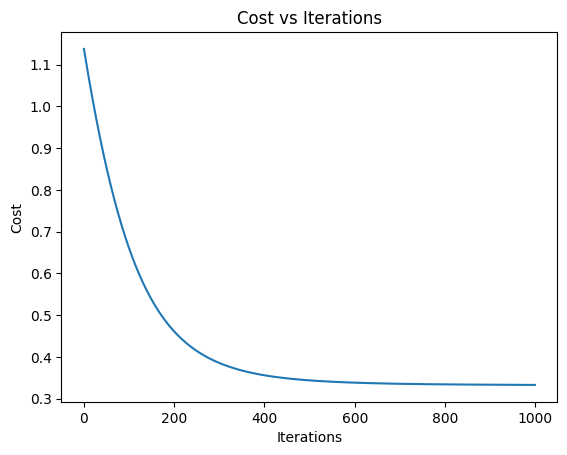

In [244]:
theta_grad = np.random.rand(x_total.shape[1])
# print(x_total.shape)
costs = []
learning_rate = 0.01
for i in range(1000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)

y_pred = predict(x_test, theta_grad)

# accuracy, precision, recall, f1 score
c = 0
tp = 0
fp = 0
fn = 0

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

    if (y_pred[i] == y_test[i]):
        c += 1
    if (y_pred[i] == 1 and y_test[i] == 1):
        tp += 1
    if (y_pred[i] == 1 and y_test[i] == 0):
        fp += 1
    if (y_pred[i] == 0 and y_test[i] == 1):
        fn += 1
        
print("Accuracy: ", c/len(y_pred))
print("Precision: ", round(tp/(tp+fp),4))
print("Recall: ", round(tp/(tp+fn),4))



# plot the cost
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()



[-0.37079541  0.58978281  0.86955351 -0.17536445 -0.24966605 -0.19986165
  1.35116841  0.4547102  -0.05196587  0.18613049  0.70422611 -0.10175641]
Accuracy:  0.88
Precision:  0.8485
Recall:  0.8869


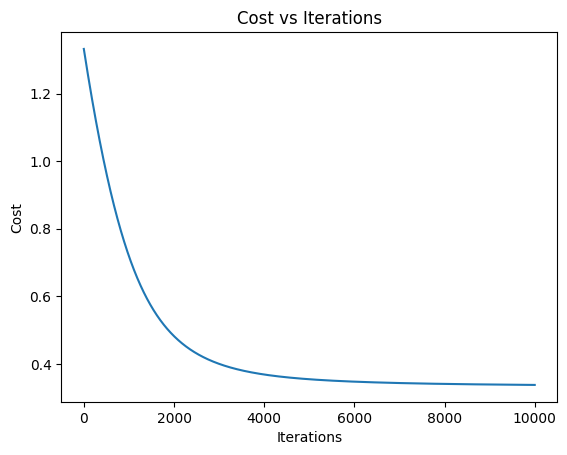

In [245]:
theta_grad = np.random.rand(x_total.shape[1])
# print(x_total.shape)
costs = []
learning_rate = 0.001
for i in range(10000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)

y_pred = predict(x_test, theta_grad)

# accuracy, precision, recall, f1 score
c = 0
tp = 0
fp = 0
fn = 0

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

    if (y_pred[i] == y_test[i]):
        c += 1
    if (y_pred[i] == 1 and y_test[i] == 1):
        tp += 1
    if (y_pred[i] == 1 and y_test[i] == 0):
        fp += 1
    if (y_pred[i] == 0 and y_test[i] == 1):
        fn += 1
        
print("Accuracy: ", c/len(y_pred))
print("Precision: ", round(tp/(tp+fp),4))
print("Recall: ", round(tp/(tp+fn),4))

# plot the cost
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

